# Experimentos para seleção de Modelo de regrassão

In [1]:
import sys
def category_encoders():
    package = 'category_encoders'
    try:
        return __import__(package)
    except ImportError:
        import sys
        !{sys.executable} -m pip install category_encoders
        return None

In [2]:
category_encoders()

<module 'category_encoders' from '/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/__init__.py'>

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
import math

In [4]:
def mean(l):
    acc = 0
    for i in l:
        acc+=i
    return acc/(len(l))

In [5]:
def std(l):
    m = mean(l)
    acc = 0
    for i in l:
        acc+= (i - m)**2
    return math.sqrt(acc/(len(l)))

In [6]:
plt.rcParams["figure.figsize"] = (12, 7)

In [7]:
df = pd.read_csv("../raw_data.csv")
# df = pd.read_csv("../final_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Editora       3917 non-null   object 
 1   ISBN          3917 non-null   object 
 2   Ano           3917 non-null   float64
 3   Edição        3917 non-null   float64
 4   Origem        3917 non-null   object 
 5   Encadernação  3917 non-null   object 
 6   Idioma        3917 non-null   object 
 7   País          3917 non-null   object 
 8   Páginas       3917 non-null   float64
 9   preço         3917 non-null   float64
 10  nome          3917 non-null   object 
 11  categoria     3917 non-null   object 
 12  Autores       3916 non-null   object 
dtypes: float64(4), object(9)
memory usage: 397.9+ KB


## Testando modelo Base line com apenas features numéricas

In [8]:
X = df[['Ano','Edição','Páginas']]
y = df['preço']

In [9]:
X['Ano'] = X['Ano'].astype(int)
X['Edição'] = X['Edição'].astype(int)
X['Páginas'] = X['Páginas'].astype(int)
X

<ipython-input-9-5ff5fe48f8ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ano'] = X['Ano'].astype(int)
<ipython-input-9-5ff5fe48f8ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Edição'] = X['Edição'].astype(int)
<ipython-input-9-5ff5fe48f8ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,Ano,Edição,Páginas
0,2018,1,384
1,2014,1,384
2,2006,1,728
3,2021,1,288
4,2015,1,20
...,...,...,...
3912,2009,1,440
3913,2014,1,408
3914,2021,1,246
3915,2017,1,252


In [10]:
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)

In [11]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média: {scores.mean()}')

[0.43169665 0.23983468 0.36822866 0.29581492 0.29016359 0.2772314
 0.36295862 0.18756651 0.1632418  0.22161373]
Pontuação r2 média: 0.2838350543212813


In [12]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização z-score: {scores.mean()}')

[0.43169665 0.23983468 0.36822866 0.29581492 0.29016359 0.2772314
 0.36295862 0.18756651 0.1632418  0.22161373]
Pontuação r2 média com normalização z-score: 0.2838350543212816


In [13]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = LinearRegression()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.43169665 0.23983468 0.36822866 0.29581492 0.29016359 0.2772314
 0.36295862 0.18756651 0.1632418  0.22161373]
Pontuação r2 média com normalização min_max: 0.28383505432128137


In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.43890219 0.23190652 0.38719228 0.30769112 0.28929794 0.24949383
 0.374511   0.19153725 0.16357031 0.20699663]
Pontuação r2 média com normalização min_max: 0.2841099070431329


## Tratando features categóricas

### Codificando origem

In [15]:
encoder=ce.OneHotEncoder(cols='Origem',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Origem','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Origem_NACIONAL,Origem_IMPORTADO,preço
0,1.0,0.0,49.90
1,1.0,0.0,59.90
2,1.0,0.0,130.00
3,1.0,0.0,38.42
4,1.0,0.0,49.90
...,...,...,...
3912,1.0,0.0,114.00
3913,1.0,0.0,98.00
3914,1.0,0.0,49.90
3915,1.0,0.0,84.90


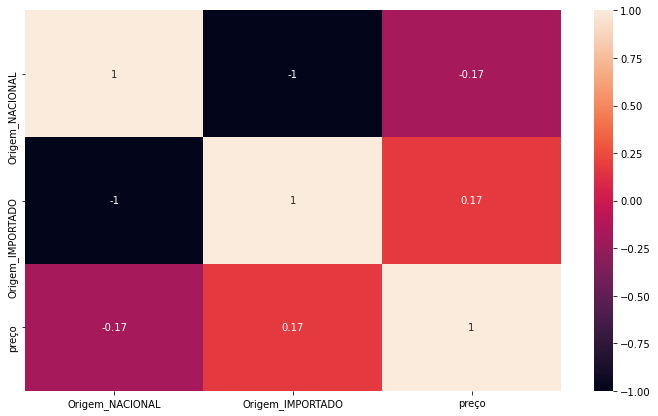

In [16]:
corr = data_encoded[['Origem_NACIONAL','Origem_IMPORTADO','preço']].corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [17]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))

In [18]:
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.43864839 0.28433426 0.40448181 0.31188605 0.35487726 0.35239248
 0.37247013 0.24205403 0.17271734 0.27696208]
Pontuação r2 média com normalização min_max: 0.32108238395376343


**Feature melhorou o modelo, então será mantida**

In [19]:
X = X_test

### Codificando País

In [20]:
encoder=ce.OneHotEncoder(cols='País',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['País','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,País_BRASIL,País_ESTADOS UNIDOS,País_FRANÇA,País_INGLATERRA,País_PORTUGAL,País_ESPANHA,País_ALEMANHA,País_ITALIA,País_MEXICO,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.42
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.90


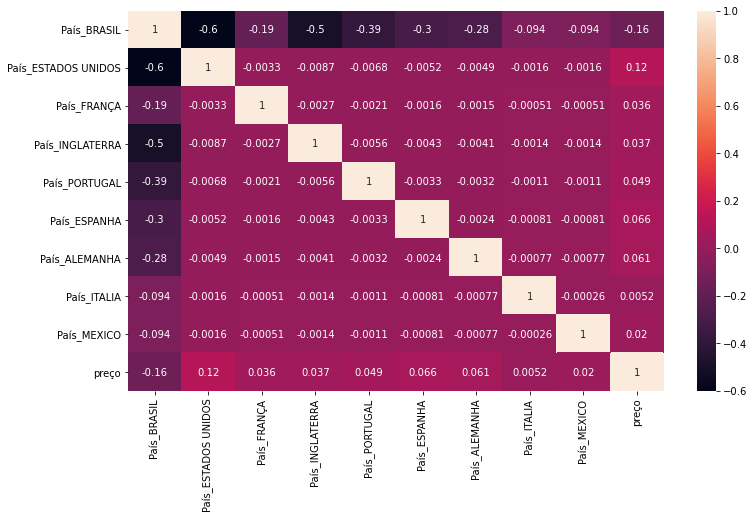

In [21]:
corr = data_encoded.filter(regex='(^País_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [22]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.43715231 0.14565266 0.38112648 0.30617712 0.36228778 0.27523021
 0.37968693 0.25446104 0.17244396 0.23851287]
Pontuação r2 média com normalização min_max: 0.29527313653631576


**Feature não melhorou o modelo**

### Codificando Idioma

In [23]:
encoder=ce.OneHotEncoder(cols='Idioma',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Idioma','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Idioma_PORTUGUÊS,Idioma_INGLÊS,Idioma_PORT. PORTUGAL,Idioma_ESPANHOL,Idioma_FRANCÊS,Idioma_ITALIANO,Idioma_JAPONÊS,Idioma_ALEMÃO,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.42
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.90


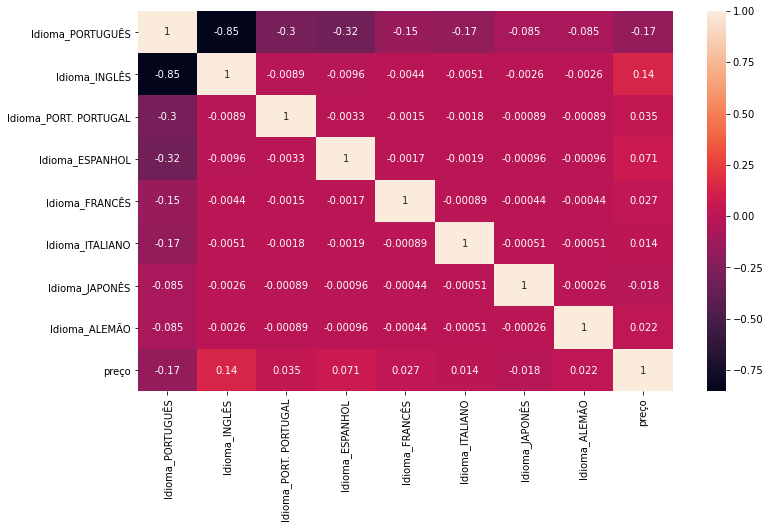

In [24]:
corr = data_encoded.filter(regex='(^Idioma_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [25]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.42802146 0.28250621 0.4008614  0.21869227 0.36378898 0.28283585
 0.37189383 0.25099428 0.17499527 0.23699927]
Pontuação r2 média com normalização min_max: 0.30115888143932235


**Feature piorou o modelo**

### Codificando encadernação

In [26]:
encoder=ce.OneHotEncoder(cols='Encadernação',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df[['Encadernação','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Encadernação_BROCHURA,Encadernação_CAPA DURA,Encadernação_LÂMINA,Encadernação_FLEXIVEL,Encadernação_CAPA DURA C/SOBRECAP,Encadernação_ESPIRAL,preço
0,1.0,0.0,0.0,0.0,0.0,0.0,49.90
1,1.0,0.0,0.0,0.0,0.0,0.0,59.90
2,1.0,0.0,0.0,0.0,0.0,0.0,130.00
3,1.0,0.0,0.0,0.0,0.0,0.0,38.42
4,0.0,1.0,0.0,0.0,0.0,0.0,49.90
...,...,...,...,...,...,...,...
3912,1.0,0.0,0.0,0.0,0.0,0.0,114.00
3913,1.0,0.0,0.0,0.0,0.0,0.0,98.00
3914,1.0,0.0,0.0,0.0,0.0,0.0,49.90
3915,0.0,1.0,0.0,0.0,0.0,0.0,84.90


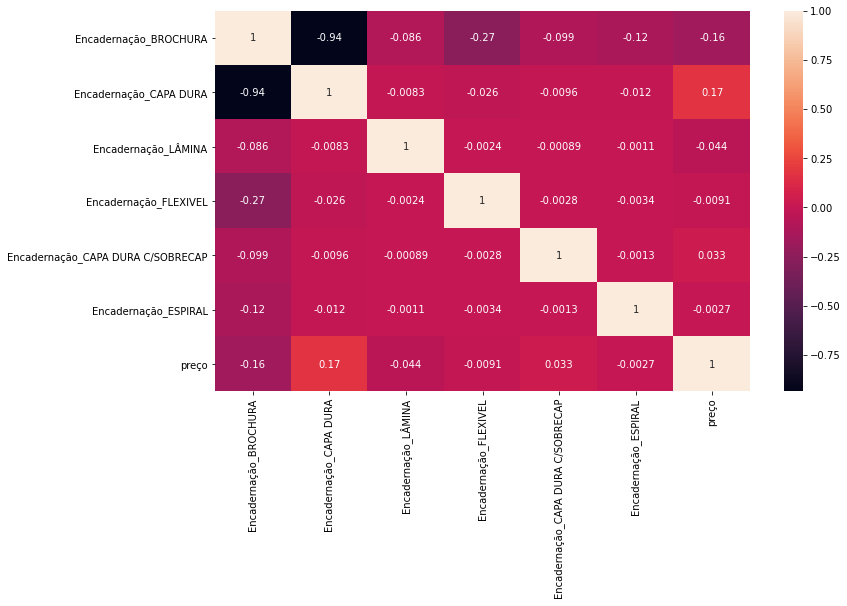

In [27]:
corr = data_encoded.filter(regex='(^Encadernação_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [28]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.43271712 0.28681378 0.40850333 0.31656787 0.31920351 0.34221036
 0.38920417 0.27597024 0.18522693 0.29350541]
Pontuação r2 média com normalização min_max: 0.324992272220944


**Feaure melhorou o modelo então será mantida**

In [29]:
X = X_test

### Categoria

In [30]:
df['categoria'].nunique()

41

In [31]:
encoder= ce.BaseNEncoder(cols=['categoria'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['categoria','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,categoria_0,categoria_1,categoria_2,categoria_3,preço
0,0,0,0,1,49.90
1,0,0,0,2,59.90
2,0,0,0,2,130.00
3,0,0,0,3,38.42
4,0,0,0,3,49.90
...,...,...,...,...,...
3912,0,1,2,3,114.00
3913,0,1,2,3,98.00
3914,0,1,2,3,49.90
3915,0,1,2,4,84.90


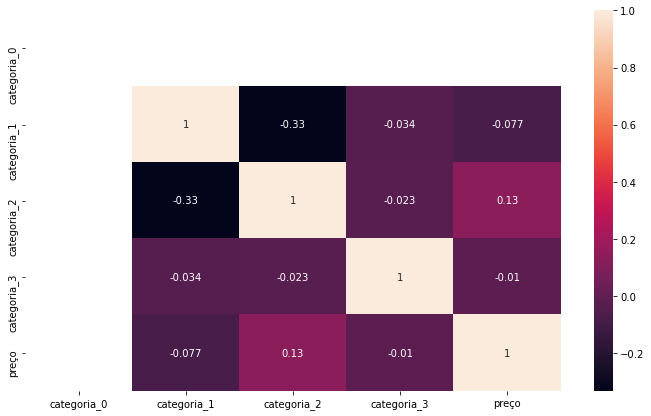

In [32]:
corr = data_encoded.filter(regex='(^categoria_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [33]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.48995162 0.39677775 0.43653453 0.38153551 0.40612739 0.33762983
 0.4804183  0.39467492 0.21687441 0.35617973]
Pontuação r2 média com normalização min_max: 0.3896703983457791


**Feature melhorou o modelo, então será mantida**

In [34]:
X = X_test

### Codificando editora

In [35]:
df['Editora'].nunique()

502

In [36]:
encoder= ce.BaseNEncoder(cols=['Editora'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['Editora','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Editora_0,Editora_1,Editora_2,Editora_3,Editora_4,preço
0,0,0,0,0,1,49.90
1,0,0,0,0,2,59.90
2,0,0,0,0,3,130.00
3,0,0,0,0,4,38.42
4,0,0,0,1,0,49.90
...,...,...,...,...,...,...
3912,0,0,0,1,4,114.00
3913,0,0,0,1,4,98.00
3914,0,0,0,1,4,49.90
3915,0,3,4,3,3,84.90


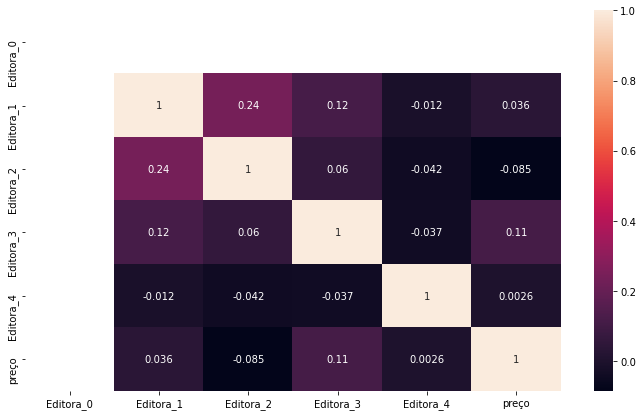

In [37]:
corr = data_encoded.filter(regex='(^Editora_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [38]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.48611483 0.37776664 0.438051   0.42446845 0.42360264 0.38345096
 0.49241457 0.45143086 0.2172067  0.36513925]
Pontuação r2 média com normalização min_max: 0.4059645904153625


**Feature Melhorou o modelo, então será mantida**

In [39]:
X = X_test

### Codificando autores

In [40]:
df['Autores'].nunique()

3008

In [41]:
encoder= ce.BaseNEncoder(cols=['Autores'],return_df=True,base=5)
data_encoded=encoder.fit_transform(df[['Autores','preço']])
data_encoded

/home/caio/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Autores_0,Autores_1,Autores_2,Autores_3,Autores_4,Autores_5,preço
0,0,0,0,0,0,1,49.90
1,0,0,0,0,0,2,59.90
2,0,0,0,0,0,3,130.00
3,0,0,0,0,0,4,38.42
4,0,0,0,0,1,0,49.90
...,...,...,...,...,...,...,...
3912,0,4,2,3,1,0,114.00
3913,0,4,4,0,1,3,98.00
3914,0,4,2,3,0,4,49.90
3915,0,4,3,2,0,0,84.90


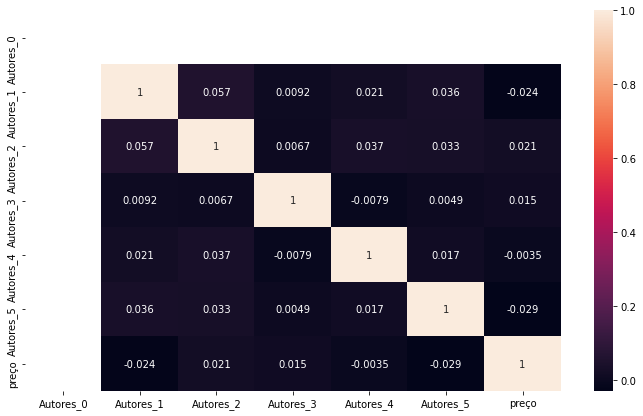

In [42]:
corr = data_encoded.filter(regex='(^Autores_.*)|(preço)',axis=1).corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [43]:
X_test = X.join(data_encoded.drop(columns=["preço"],axis=1))
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.47171704 0.4038602  0.42002495 0.44586727 0.44141545 0.37673303
 0.48015479 0.45759235 0.22244421 0.37514487]
Pontuação r2 média com normalização min_max: 0.4094954164631271


**Feature manteve ou piorou o resultado, então será desprezada**

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3917 entries, 0 to 3916
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ano                                3917 non-null   int64  
 1   Edição                             3917 non-null   int64  
 2   Páginas                            3917 non-null   int64  
 3   Origem_NACIONAL                    3917 non-null   float64
 4   Origem_IMPORTADO                   3917 non-null   float64
 5   Encadernação_BROCHURA              3917 non-null   float64
 6   Encadernação_CAPA DURA             3917 non-null   float64
 7   Encadernação_LÂMINA                3917 non-null   float64
 8   Encadernação_FLEXIVEL              3917 non-null   float64
 9   Encadernação_CAPA DURA C/SOBRECAP  3917 non-null   float64
 10  Encadernação_ESPIRAL               3917 non-null   float64
 11  categoria_0                        3917 non-null   int64

### Testando novamente o modelo

In [45]:
X

,Ano,Edição,Páginas,Origem_NACIONAL,Origem_IMPORTADO,Encadernação_BROCHURA,Encadernação_CAPA DURA,Encadernação_LÂMINA,Encadernação_FLEXIVEL,Encadernação_CAPA DURA C/SOBRECAP,Encadernação_ESPIRAL,categoria_0,categoria_1,categoria_2,categoria_3,Editora_0,Editora_1,Editora_2,Editora_3,Editora_4
0,2018,1,384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1
1,2014,1,384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,0,0,0,0,2
2,2006,1,728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,0,0,0,0,3
3,2021,1,288,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,3,0,0,0,0,4
4,2015,1,20,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3912,2009,1,440,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,2,3,0,0,0,1,4
3913,2014,1,408,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,2,3,0,0,0,1,4
3914,2021,1,246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,2,3,0,0,0,1,4
3915,2017,1,252,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,2,4,0,3,4,3,3


In [46]:
model = MLPRegressor()
scores = cross_val_score(model, X_scaled, y, cv=cv_outer,scoring='r2',n_jobs=-1)
print(scores)
print(f'Pontuação r2 média com normalização min_max: {scores.mean()}')

[0.47183198 0.38233964 0.41933304 0.43724635 0.43955758 0.36298177
 0.48562061 0.47918303 0.22798375 0.3811043 ]
Pontuação r2 média com normalização min_max: 0.4087182057708739


## Seleção de modelo

In [47]:
cv_inner = KFold(n_splits=5, shuffle=True, random_state=64)

### Testando Lasso

In [48]:
outer_results = []
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    model = linear_model.Lasso()
    space = {'alpha':[.0001,.001,.01,.1,1, .5, 10,100]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))


>R2=0.456, est=0.349, cfg={'alpha': 0.5}
>R2=0.341, est=0.349, cfg={'alpha': 1}


/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99052.93899662513, tolerance: 1496.7639843573725
  model = cd_fast.enet_coordinate_descent(
/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89329.00200292096, tolerance: 1269.5150075631598
  model = cd_fast.enet_coordinate_descent(
/home/caio/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99083.2194595635, tolerance: 1496.7639843573725
  model = cd_fast.enet_coordinate_descent(


>R2=0.402, est=0.347, cfg={'alpha': 1}
>R2=0.330, est=0.347, cfg={'alpha': 1}
>R2=0.374, est=0.350, cfg={'alpha': 1}
>R2=0.400, est=0.349, cfg={'alpha': 1}
>R2=0.395, est=0.343, cfg={'alpha': 1}
>R2=0.297, est=0.351, cfg={'alpha': 1}
>R2=0.212, est=0.344, cfg={'alpha': 1}
>R2=0.311, est=0.356, cfg={'alpha': 1}
R2: 0.352 (0.066)


### Testando Ridge

In [49]:
outer_results = []
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    model = Ridge()
    space = {'alpha':[.0001,.001,.01,.1,1, .5, 10,100,200,1000]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>R2=0.450, est=0.349, cfg={'alpha': 100}
>R2=0.343, est=0.350, cfg={'alpha': 200}
>R2=0.399, est=0.346, cfg={'alpha': 200}
>R2=0.331, est=0.349, cfg={'alpha': 200}
>R2=0.373, est=0.350, cfg={'alpha': 200}
>R2=0.407, est=0.349, cfg={'alpha': 200}
>R2=0.395, est=0.339, cfg={'alpha': 200}
>R2=0.309, est=0.350, cfg={'alpha': 200}
>R2=0.216, est=0.350, cfg={'alpha': 1000}
>R2=0.294, est=0.357, cfg={'alpha': 1000}
R2: 0.352 (0.064)


### Testando ElasticNet

In [50]:
outer_results = []
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    model = ElasticNet(max_iter=100000)
    space = {'alpha':[.0001,.001,.01,.1,1, .5, 10,100,200,1000],'l1_ratio':[.01,.1,.2,.3,.5,.7,.8,.95]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>R2=0.447, est=0.350, cfg={'alpha': 0.1, 'l1_ratio': 0.5}
>R2=0.352, est=0.352, cfg={'alpha': 0.5, 'l1_ratio': 0.8}
>R2=0.397, est=0.347, cfg={'alpha': 1, 'l1_ratio': 0.95}
>R2=0.329, est=0.350, cfg={'alpha': 0.5, 'l1_ratio': 0.8}
>R2=0.375, est=0.351, cfg={'alpha': 0.5, 'l1_ratio': 0.95}
>R2=0.420, est=0.350, cfg={'alpha': 1, 'l1_ratio': 0.95}
>R2=0.392, est=0.343, cfg={'alpha': 1, 'l1_ratio': 0.95}
>R2=0.302, est=0.353, cfg={'alpha': 1, 'l1_ratio': 0.95}
>R2=0.217, est=0.354, cfg={'alpha': 0.5, 'l1_ratio': 0.7}
>R2=0.295, est=0.362, cfg={'alpha': 1, 'l1_ratio': 0.8}
R2: 0.353 (0.065)


### Testando SVR

In [51]:
outer_results = []
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    model = SVR()
    space = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[.0001,.001,.01,.1,1,10,100,1000]}
    search = GridSearchCV(model, space, scoring='r2', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    r2 = r2_score(y_test, yhat)
    outer_results.append(r2)
    # report progress
    print('>R2=%.3f, est=%.3f, cfg=%s' % (r2, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('R2: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>R2=0.259, est=0.417, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.535, est=0.436, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.524, est=0.440, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.544, est=0.417, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.533, est=0.385, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.519, est=0.438, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.478, est=0.419, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.590, est=0.417, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.239, est=0.451, cfg={'C': 1000, 'kernel': 'rbf'}
>R2=0.513, est=0.478, cfg={'C': 1000, 'kernel': 'rbf'}
R2: 0.473 (0.115)
